In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
import scipy.io as sio
import matplotlib.pyplot as plt

import time

from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Reshape
from keras.models import Sequential
from keras.optimizers import SGD


Using TensorFlow backend.


## 将数据导入进来

由于数据是`.mat`格式的，因此在这里需要用到`scipy`的数据处理方法。

Reference tutorial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html and https://docs.scipy.org/doc/scipy/reference/tutorial/io.html

In [2]:
mat = sio.loadmat('data200.mat')

In [3]:
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Apr 21 17:00:33 2014',
 '__version__': '1.0',
 'source': array([[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ..., 
        [1, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]], dtype=uint8),
 'target': array([[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)}

In [4]:
data = mat['source']
print(data)
print("*"*100)
print("The shape of Source data is (%s,%s)" % data.shape)
print("*"*100)

[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 1]
 [1 1 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]]
****************************************************************************************************
The shape of Source data is (1024,12400)
****************************************************************************************************


In [5]:
labels = mat['target']
print(labels)
print("*"*100)
print("The shape of Label is (%s,%s)" % labels.shape)
print("*"*100)

[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 1 1]]
****************************************************************************************************
The shape of Label is (62,12400)
****************************************************************************************************


## 继续对数据进行处理

由于我们需要的数据维度分别是`data->(12400, 1024)`和`labels->(12400, 62)`，因此需要将数据进行转置操作。

In [6]:
# transfer matrix to numpy array
data = np.array(data.transpose())
labels = np.array(labels.transpose())

In [7]:
print(data.shape)
print(labels.shape)

(12400, 1024)
(12400, 62)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20)


In [9]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9920, 1024)
(2480, 1024)
(9920, 62)
(2480, 62)


## 如果使用CNN来做分类，则需要继续下一步的数据处理

In [10]:
# cnn_label = np.array([label for label in tqdm(labels)], dtype=np.float64)
# cnn_data = np.array([c_data for c_data in tqdm(data)], dtype=np.float64)
image_array = np.reshape(data, (len(data), 32, 32, 1))
print(labels.shape)
print(image_array.shape)

(12400, 62)
(12400, 32, 32, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(image_array, labels, test_size=0.20)


In [10]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(9920, 32, 32, 1)
(2480, 32, 32, 1)
(9920, 62)
(2480, 62)


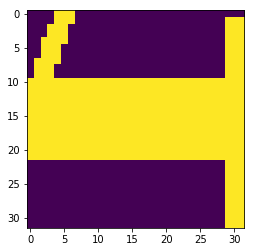

In [16]:
image = data[300,:]
# print image
image = np.reshape(image, (32, 32))

plt.imshow(image)
plt.show()

In [17]:
model = Sequential()



print( 'Training...')

# CONVOLUTION

# When using THEANO backend
# model.add(Reshape((1, 120, 320), input_shape=(120, 320)))

# # When using TENSORFLOW backend
# model.add(Reshape((120, 320, 1), input_shape=(120, 320)))

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32 ,32, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(30, init='uniform'))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(62, init='uniform'))
model.add(Activation('softmax'))


model.summary()

Training...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 14, 64)    18496       maxpooling2d_1[0][0]             
_______________________________________________________________________________

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# # train 
# for step in range(301):
#     cost = model.train_on_batch(X_train, y_train)
#     if step %  100 ==0:
#         print('train cost ', cost)
# Fit the model
model.fit(X_train, y_train,
          nb_epoch=30,
          batch_size=50)

In [ ]:
model.save('cnn.h5')

### 加载模型

In [12]:
from keras.models import load_model

cnn = load_model('cnn.h5')

In [13]:
print(data[300,:])
print(labels[300].argmax())

[0 0 0 ..., 1 1 1]
1


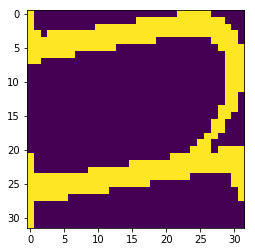

30


In [14]:
image = X_train[300,:]
label = y_train[300]
# print image
image = np.reshape(image, (32, 32))

plt.imshow(image)
plt.show()
print(label.argmax())

In [20]:
image2 = X_train[1,:]
label2 = y_train[1]
# print image
image2 = np.reshape(image2, (1, 32, 32, 1))
print(cnn.predict(image2))



[[  8.11576655e-08   3.91493782e-11   1.60749693e-14   4.35068592e-10
    6.91537709e-16   2.76456404e-07   4.02228528e-04   6.26252661e-10
    8.11539794e-11   6.88183177e-10   4.37216835e-16   1.40937022e-08
    7.17251074e-13   7.16749854e-11   2.24178712e-06   3.44582624e-03
    1.09994707e-08   1.94118588e-08   3.31351941e-08   9.80393322e-18
    1.22963976e-13   1.67161772e-15   8.30786855e-14   5.25584685e-16
    1.88771457e-10   4.74638141e-11   1.97307601e-15   1.95729891e-12
    3.05100459e-11   1.13513217e-07   1.73328284e-13   1.11368215e-11
    4.61692906e-11   8.22132577e-18   2.02242045e-09   5.56958646e-12
    5.90947690e-12   7.60661715e-05   1.76411881e-08   1.09833887e-12
    7.52136384e-06   9.96065080e-01   5.64792346e-09   4.09595188e-12
    1.16555277e-09   2.20708783e-14   1.16039201e-11   7.18315221e-08
    1.83925751e-14   9.62694703e-15   9.33621069e-10   3.79032539e-09
    2.50701904e-10   2.17169699e-07   6.07349067e-12   7.24819529e-08
    1.05454742e-19  

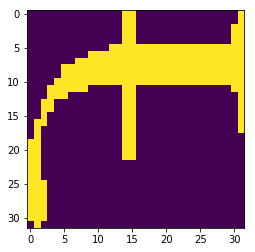

In [17]:
image2 = X_train[1,:]
image2 = np.reshape(image2, (32, 32))
plt.imshow(image2)
plt.show()